# Exercise - Duration

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

## 1 Stylized Duration and Convexity

Consider a bond issued today, with
* 10 years to maturity
* coupon rate of 3%
* yield to maturity (semiannual) is 5\%


### 1.1.

Calculate duration as given in the formula.

### 1.2.
Re-calculate the duration but now assuming the coupon is 7%. (Leave the other parameters the same.)

### 1.3.
Re-calculate the duration but now assuming the coupon is 5%. (Leave the other parameters the same.)

### 1.4.
Compare the answers. How does coupon rate impact duration. Explain.

In [5]:
#1.1 
#write a formula for calculatiing the duration of a bond given the maturity, coupon rate, yield to maturity, and face value.
import numpy as np
def bond_duration(face_value, coupon_rate, ytm, maturity, frequency=2):
    """
    Computes Macaulay and Modified Duration of a bond.

    Parameters
    ----------
    face_value : float
        Par value of the bond (e.g. 1000)
    coupon_rate : float
        Annual coupon rate (e.g. 0.05 for 5%)
    ytm : float
        Annual yield to maturity (e.g. 0.06 for 6%)
    maturity : int or float
        Years to maturity
    frequency : int
        Coupon payments per year (1=annual, 2=semiannual)

    Returns
    -------
    macaulay_duration : float
    modified_duration : float
    """

    periods = int(maturity * frequency)
    coupon = face_value * coupon_rate / frequency
    y = ytm / frequency

    cash_flows = np.array([coupon] * periods)
    cash_flows[-1] += face_value

    times = np.arange(1, periods + 1)

    discount_factors = 1 / (1 + y) ** times
    pv_cash_flows = cash_flows * discount_factors

    price = pv_cash_flows.sum()

    macaulay_duration = np.sum(times * pv_cash_flows) / price / frequency
    modified_duration = macaulay_duration / (1 + y)

    return macaulay_duration, modified_duration


In [8]:
bond_duration(100, 0.03, 0.05, 10)

(np.float64(8.570879486771778), np.float64(8.361833645631004))

In [10]:
#1.2 Coupon is 7%
bond_duration(1000, 0.07, 0.05, 10)

(np.float64(7.564844312053696), np.float64(7.380335914198728))

In [11]:
#1.3 Coupon is 5%
bond_duration(1000, 0.05, 0.05, 10)

(np.float64(7.989445671393991), np.float64(7.794581142823406))

### 1.4 How does coupon rate impact duration?
As the coupon rate oes up, duration goes down. This makes sense because duration is the average time for cashflows and with a higher coupon rate we are receiving more faster so our duration is shorter.


***

# 2 Hedging Duration

Use data from `../data/treasury_ts_duration_2025-05-30.xlsx`.

The file contains time-series information on two treasuries. 

In [13]:
import pandas as pd

In [14]:
QUOTE_DATE = '2025-05-30'
filepath = f'/Users/luciemartin/Downloads/treasury_ts_duration_2025-05-30.xlsx'

data = pd.read_excel(filepath,sheet_name='database')
data_info =  data.drop_duplicates(subset='KYTREASNO', keep='first').set_index('KYTREASNO')
data_info[['type','issue date','maturity date','cpn rate']]

,type,issue date,maturity date,cpn rate
KYTREASNO,,,,
207391,note,2019-08-15,2029-08-15,1.625
207392,bond,2019-08-15,2049-08-15,2.250


You will largely focus on the sheets which give the timeseries of prices and durations for each of the two securities, as shown in the following code.

In [16]:
SHEET_CLEAN = 'clean price'
SHEET_DIRTY = 'dirty price'
SHEET_DURATION = 'duration'
INDEX_NAME = 'quote date'

clean = pd.read_excel(filepath,sheet_name=SHEET_CLEAN).set_index(INDEX_NAME)
dirty = pd.read_excel(filepath,sheet_name=SHEET_DIRTY).set_index(INDEX_NAME)
duration = pd.read_excel(filepath,sheet_name=SHEET_DURATION).set_index(INDEX_NAME)

Set prices to clean or dirty...

In [17]:
USE_CLEAN = True

if USE_CLEAN:
    price = clean
else:
    price = dirty

In [18]:
display(price)

,207391,207392
quote date,,
2019-08-09,98.882812,99.789062
2019-08-12,99.796875,102.554688
2019-08-13,99.281250,101.867188
2019-08-14,100.406250,105.179688
2019-08-15,100.882812,106.234375
...,...,...
2025-05-23,90.904697,59.948053
2025-05-27,91.035156,60.871094
2025-05-28,90.910156,60.542969


Duration...

In [19]:
display(duration)

,207391,207392
quote date,,
2019-08-09,9.289497,22.000102
2019-08-12,9.285468,22.118496
2019-08-13,9.280314,22.084308
2019-08-14,9.282750,22.228549
2019-08-15,9.282163,22.270910
...,...,...
2025-05-23,4.081232,16.706728
2025-05-27,4.070393,16.764143
2025-05-28,4.067509,16.736880


In [43]:
display(data)

,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm,duration
0,207391,note,2020-05-07,2019-08-15,2029-08-15,9.273101,0.450549,1.625,109.062500,109.125000,109.093750,0.366071,109.459821,0.006149,8.656529
1,207391,note,2024-03-27,2019-08-15,2029-08-15,5.385352,0.225275,1.625,87.906250,87.921875,87.914062,0.183036,88.097098,0.041529,5.154032
2,207391,note,2024-03-26,2019-08-15,2029-08-15,5.388090,0.219780,1.625,87.718750,87.750000,87.734375,0.178571,87.912946,0.041921,5.156471
3,207391,note,2024-03-25,2019-08-15,2029-08-15,5.390828,0.214286,1.625,87.695312,87.742188,87.718750,0.174107,87.892857,0.041944,5.159194
4,207391,note,2024-03-22,2019-08-15,2029-08-15,5.399042,0.197802,1.625,87.890625,87.937500,87.914062,0.160714,88.074777,0.041468,5.167777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,207392,bond,2021-07-09,2019-08-15,2049-08-15,28.101300,0.795580,2.250,105.378906,105.441406,105.410156,0.895028,106.305184,0.019975,21.032185
2905,207392,bond,2021-07-08,2019-08-15,2049-08-15,28.104038,0.790055,2.250,106.746094,106.808594,106.777344,0.888812,107.666156,0.019362,21.088972
2906,207392,bond,2021-07-07,2019-08-15,2049-08-15,28.106776,0.784530,2.250,106.472656,106.535156,106.503906,0.882597,107.386503,0.019484,21.080968
2907,207392,bond,2021-07-02,2019-08-15,2049-08-15,28.120465,0.756906,2.250,103.742188,103.804688,103.773438,0.851519,104.624957,0.020723,20.985049


### 2.1.

Suppose you have a portfolio of `10,000` USD long in security `207391` on the first day of the sample.

If you want to manage interest rate exposure using duration, how large of a short position should you hold in `207392`?

In [30]:
import datetime as dt
import pandas as pd
import numpy as np
def duration_hedge(
    D_long,
    D_short,
    P_short,
    MV_long,
    principal=100
):
    """
    Computes the duration-hedge short position.

    Parameters
    ----------
    D_long : float
        Modified duration of the long bond
    D_short : float
        Modified duration of the hedging (short) bond
    P_short : float
        Clean price of the short bond (quoted per 'principal')
    MV_long : float
        Market value of the long position (USD)
    principal : float, optional
        Quoting principal for bond prices (default = 100)

    Returns
    -------
    MV_short : float
        Market value of the short position (USD)
    units_short : float
        Number of bonds (or notional units) to short
    """

    # Market value needed for the hedge
    MV_short = (MV_long * D_long) / D_short

    # Convert price to per-1 notional
    price_per_unit = P_short / principal

    # Number of bonds / notional units to short
    units_short = MV_short / price_per_unit

    return MV_short, units_short

date = pd.Timestamp('2019-08-09')

MV_short, units_short = duration_hedge(
    D_long=duration.loc[date, 207391],
    D_short=duration.loc[date, 207392],
    P_short=price.loc[date, 207392],  # hedge bond price
    MV_long=10_000
)

MV_short, units_short


(np.float64(4222.479082922904), np.float64(4231.404702216642))

You should short 4231 units and you need 4222 to do so.

### 2.2.

Step through the time-series, doing the following:

* Starting at the end of the first day, set the hedged position according to the relative given durations.
* Use the second day's price data to evaluate the net profit or loss of the hedged position.
* Reset the the hedged position using the end-of-second-day durations. Again fix the long position of security `207391` to be `10,000`.
* Repeat throughout the timeseries.

Calculate the daily profit and loss (PnL) for the
* dynamically hedged position constructed above.
* long-only position, (still at `10,000` throughout.)

(You might check to verify that the net duration is zero at all dates.)

Report...
* the cumulative PnL of both strategies via a plot.
* the (daily) mean, standard deviation, min, and max of the PnL in a table.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def calculate_dynamic_hedge_pnl(duration, price, MV_long=10000, principal=100):
    """
    Calculate daily PnL for dynamically hedged and long-only positions.
    
    Parameters
    ----------
    duration : pd.DataFrame
        Duration data with dates as index, securities as columns
    price : pd.DataFrame
        Price data with dates as index, securities as columns
    MV_long : float
        Fixed market value of long position
    principal : float
        Bond quoting principal
        
    Returns
    -------
    results_df : pd.DataFrame
        DataFrame with daily PnL for both strategies
    summary_stats : pd.DataFrame
        Summary statistics for both strategies
    """
    
    dates = duration.index
    
    # Initialize tracking arrays
    pnl_hedged = []
    pnl_long_only = []
    net_durations = []
    
    # Track positions
    units_long_207391 = MV_long / (price.loc[dates[0], 207391] / principal)
    units_short_207392 = None
    
    for i in range(len(dates) - 1):
        current_date = dates[i]
        next_date = dates[i + 1]
        
        # Set hedge at end of current day
        MV_short, units_short_207392 = duration_hedge(
            D_long=duration.loc[current_date, 207391],
            D_short=duration.loc[current_date, 207392],
            P_short=price.loc[current_date, 207392],
            MV_long=MV_long,
            principal=principal
        )
        
        # Calculate net duration (should be ~0)
        MV_long_check = units_long_207391 * (price.loc[current_date, 207391] / principal)
        net_duration = (MV_long_check * duration.loc[current_date, 207391] - 
                       MV_short * duration.loc[current_date, 207392])
        net_durations.append(net_duration)
        
        # Evaluate PnL using next day's prices
        price_change_207391 = (price.loc[next_date, 207391] - 
                               price.loc[current_date, 207391]) / principal
        price_change_207392 = (price.loc[next_date, 207392] - 
                               price.loc[current_date, 207392]) / principal
        
        # Hedged position PnL: long 207391 + short 207392
        pnl_long = units_long_207391 * price_change_207391
        pnl_short = -units_short_207392 * price_change_207392  # negative because short
        daily_pnl_hedged = pnl_long + pnl_short
        pnl_hedged.append(daily_pnl_hedged)
        
        # Long-only PnL
        daily_pnl_long_only = units_long_207391 * price_change_207391
        pnl_long_only.append(daily_pnl_long_only)
        
        # Reset long position to $10,000 at end of next day
        units_long_207391 = MV_long / (price.loc[next_date, 207391] / principal)
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'date': dates[1:],
        'pnl_hedged': pnl_hedged,
        'pnl_long_only': pnl_long_only,
        'cumulative_pnl_hedged': np.cumsum(pnl_hedged),
        'cumulative_pnl_long_only': np.cumsum(pnl_long_only),
        'net_duration': net_durations
    }).set_index('date')
    
    # Summary statistics
    summary_stats = pd.DataFrame({
        'Hedged Position': [
            results_df['pnl_hedged'].mean(),
            results_df['pnl_hedged'].std(),
            results_df['pnl_hedged'].min(),
            results_df['pnl_hedged'].max()
        ],
        'Long-Only Position': [
            results_df['pnl_long_only'].mean(),
            results_df['pnl_long_only'].std(),
            results_df['pnl_long_only'].min(),
            results_df['pnl_long_only'].max()
        ]
    }, index=['Mean', 'Std Dev', 'Min', 'Max'])
    
    return results_df, summary_stats

# Example usage (replace with your actual data):
# results_df, summary_stats = calculate_dynamic_hedge_pnl(duration, price)



In [33]:
results_df, summary_stats = calculate_dynamic_hedge_pnl(duration, price)
results_df, summary_stats

(            pnl_hedged  pnl_long_only  cumulative_pnl_hedged  \
 date                                                           
 2019-08-12  -24.585820      92.438967             -24.585820   
 2019-08-13  -23.524773     -51.667450             -48.110593   
 2019-08-14  -23.332664     113.314448             -71.443256   
 2019-08-15    5.588175      47.463430             -65.855082   
 2019-08-16   33.309442     -24.006815             -32.545640   
 ...                ...            ...                    ...   
 2025-05-23    8.394856      12.736589             455.586146   
 2025-05-27  -23.262411      14.351233             432.323735   
 2025-05-28   -0.642659     -13.730959             431.681076   
 2025-05-29    0.211062      23.417692             431.892138   
 2025-05-30   19.194215      22.291287             451.086352   
 
             cumulative_pnl_long_only  net_duration  
 date                                                
 2019-08-12                 92.438967  0.0000

In [34]:
def plot_cumulative_pnl(results_df):
    """Plot cumulative PnL for both strategies."""
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Cumulative PnL
    ax1 = axes[0]
    ax1.plot(results_df.index, results_df['cumulative_pnl_hedged'], 
             label='Hedged Position', linewidth=2)
    ax1.plot(results_df.index, results_df['cumulative_pnl_long_only'], 
             label='Long-Only Position', linewidth=2)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative PnL ($)')
    ax1.set_title('Cumulative Profit and Loss: Hedged vs Long-Only')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Net duration verification
    ax2 = axes[1]
    ax2.plot(results_df.index, results_df['net_duration'], 
             color='green', linewidth=2)
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Net Duration')
    ax2.set_title('Net Duration of Hedged Position (Should be ~0)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

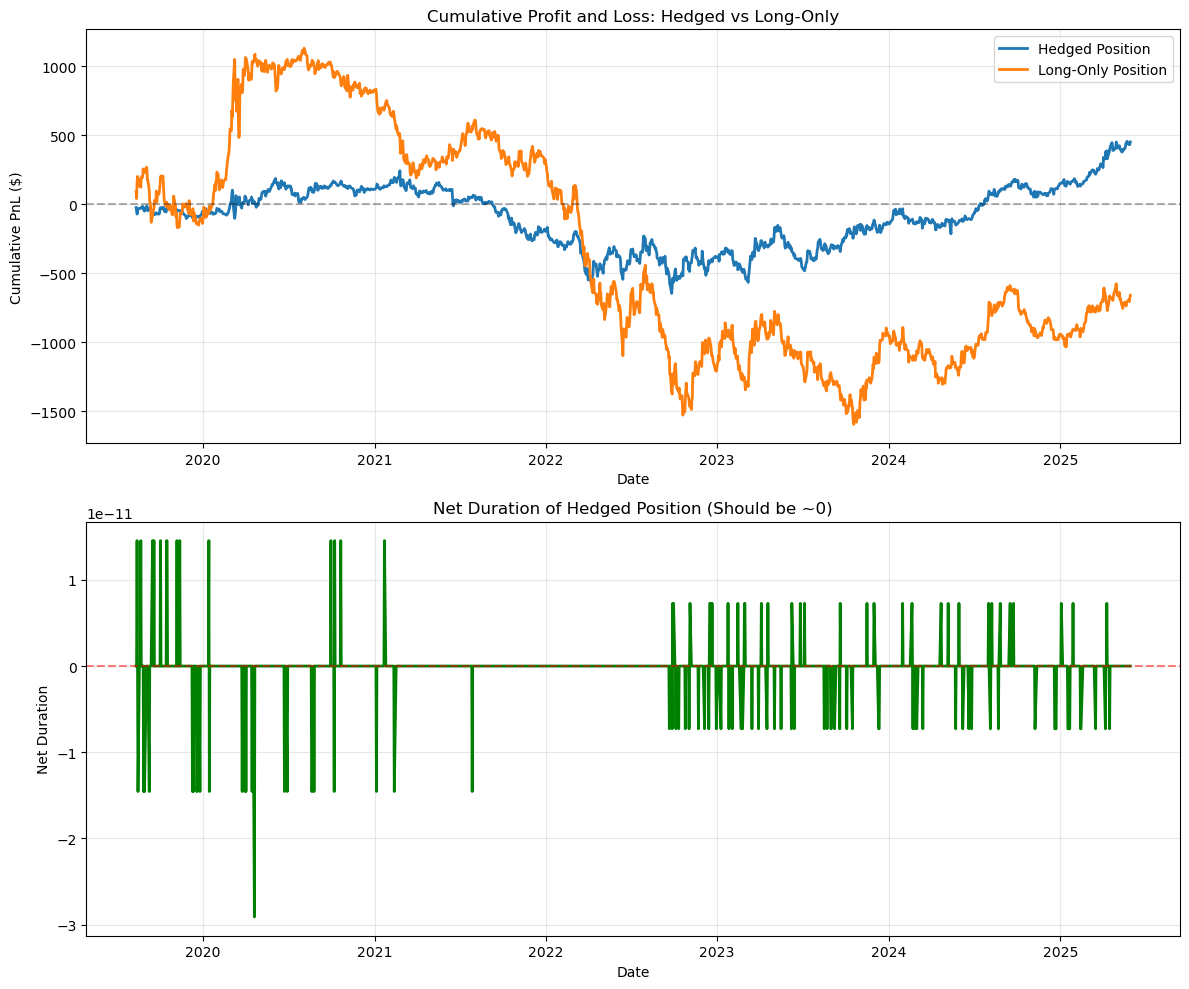

In [37]:
fig = plot_cumulative_pnl(results_df)


### 2.3.

Give two reasons that the daily PnL is not always zero for the hedged position given that we have hedged the duration.
- Duration is a first-order (linear) approximation of how bond prices change with interest rate but the actual relationship between bond prices and yields is convex (curved).Since the two securities (207391 note and 207392 bond) have different convexities (the bond has much higher convexity due to its longer maturity), they respond differently to interest rate changes beyond the linear approximation. This creates PnL even when duration is matched.
- Duration hedging assumes interest rates move by the same amount across all maturities (parallel shift). Duration hedging only works perfectly if the entire yield curve shifts in parallel. Real yield curve movements are non-parallel, creating basis risk between the two positions.

### 2.4. 
The PnL above doesn't account for the coupons.

Calculate a dataframe indexed by dates with columns for the two treasuries with values of coupon payments. 
* Recall that the stated coupon rate is semiannual, so at any give coupon date, it pays half the stated rate.
* Figure out the coupon dates by using the `data` tab and looking for dates where `acc int` goes down. Recall that accrued interest measures the portion of the coupon period that has passed. So when this resets, it is because the coupon has been paid.

Report the first 5 dates that a coupon is paid (by either bond).

In [55]:
import pandas as pd
import numpy as np

def identify_coupon_dates(df):
    """
    Identify coupon payment dates by finding when accrued interest resets (goes down).
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw data with columns: KYTREASNO, quote date, accrued int, cpn rate
        
    Returns
    -------
    coupon_df : pd.DataFrame
        DataFrame indexed by date with columns for each security showing coupon payments
    coupon_dates : list
        List of all unique coupon payment dates
    """
    # Convert quote date to datetime
    df = df.copy()
    df['quote date'] = pd.to_datetime(df['quote date'])
    df = df.sort_values(['KYTREASNO', 'quote date'])
    
    # Dictionary to store coupon payment info
    coupon_payments = {207391: {}, 207392: {}}
    
    # Process each security
    for security in [207391, 207392]:
        security_data = df[df['KYTREASNO'] == security].copy()
        security_data = security_data.sort_values('quote date')
        
        # Get coupon rate (annual, semiannual payment = rate/2)
        cpn_rate = security_data['cpn rate'].iloc[0]
        semiannual_coupon = cpn_rate / 2  # Half the annual rate
        
        # Find where accrued interest decreases (coupon payment)
        security_data['acc_int_prev'] = security_data['accrued int'].shift(1)
        security_data['acc_int_change'] = security_data['accrued int'] - security_data['acc_int_prev']
        
        # Coupon dates are where accrued interest goes down (negative change)
        coupon_mask = security_data['acc_int_change'] < 0
        coupon_dates_security = security_data.loc[coupon_mask, 'quote date']
        
        # Store coupon payments
        for date in coupon_dates_security:
            coupon_payments[security][date] = semiannual_coupon
    
    # Get all unique dates from the dataset
    all_dates = sorted(df['quote date'].unique())
    
    # Create DataFrame with all dates and coupon payments
    coupon_df = pd.DataFrame(index=all_dates, columns=[207391, 207392])
    coupon_df.index.name = 'date'
    coupon_df = coupon_df.fillna(0.0)
    
    # Fill in coupon payments
    for security in [207391, 207392]:
        for date, payment in coupon_payments[security].items():
            if date in coupon_df.index:
                coupon_df.loc[date, security] = payment
    
    # Get list of all coupon dates (either security)
    coupon_dates = sorted(set(list(coupon_payments[207391].keys()) + 
                             list(coupon_payments[207392].keys())))
    
    return coupon_df, coupon_dates

def display_coupon_analysis(df):
    """
    Display coupon payment analysis including first 5 coupon dates.
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw data with columns: KYTREASNO, quote date, accrued int, cpn rate
    """
    coupon_df, coupon_dates = identify_coupon_dates(df)
    
    print("=" * 80)
    print("COUPON PAYMENT ANALYSIS")
    print("=" * 80)
    
    # Show coupon rates
    print("\nCoupon Rates (Annual):")
    for security in [207391, 207392]:
        security_data = df[df['KYTREASNO'] == security]
        cpn_rate = security_data['cpn rate'].iloc[0]
        print(f"  Security {security}: {cpn_rate:.3f}% → Semiannual payment: {cpn_rate/2:.4f}%")
    
    print("\n" + "=" * 80)
    print("FIRST 5 COUPON PAYMENT DATES")
    print("=" * 80)
    
    if len(coupon_dates) >= 5:
        for i, date in enumerate(coupon_dates[:5], 1):
            payments = []
            if coupon_df.loc[date, 207391] > 0:
                payments.append(f"207391: {coupon_df.loc[date, 207391]:.4f}%")
            if coupon_df.loc[date, 207392] > 0:
                payments.append(f"207392: {coupon_df.loc[date, 207392]:.4f}%")
            
            print(f"{i}. {date.strftime('%Y-%m-%d')}: {', '.join(payments)}")
    else:
        print(f"Only {len(coupon_dates)} coupon dates found.")
        for i, date in enumerate(coupon_dates, 1):
            payments = []
            if coupon_df.loc[date, 207391] > 0:
                payments.append(f"207391: {coupon_df.loc[date, 207391]:.4f}%")
            if coupon_df.loc[date, 207392] > 0:
                payments.append(f"207392: {coupon_df.loc[date, 207392]:.4f}%")
            
            print(f"{i}. {date.strftime('%Y-%m-%d')}: {', '.join(payments)}")
    
    print("=" * 80)
    
    # Summary statistics
    total_coupons_207391 = (coupon_df[207391] > 0).sum()
    total_coupons_207392 = (coupon_df[207392] > 0).sum()
    
    print(f"\nTotal coupon payments found:")
    print(f"  Security 207391: {total_coupons_207391} payments")
    print(f"  Security 207392: {total_coupons_207392} payments")
    print(f"  Total unique dates: {len(coupon_dates)}")
    print("=" * 80)
    
    return coupon_df, coupon_dates

In [56]:
df = data[['KYTREASNO', 'quote date', 'accrued int', 'cpn rate']]
coupon_df, coupon_dates = display_coupon_analysis(df)

COUPON PAYMENT ANALYSIS

Coupon Rates (Annual):
  Security 207391: 1.625% → Semiannual payment: 0.8125%
  Security 207392: 2.250% → Semiannual payment: 1.1250%

FIRST 5 COUPON PAYMENT DATES
1. 2020-02-18: 207391: 0.8125%, 207392: 1.1250%
2. 2020-08-17: 207391: 0.8125%, 207392: 1.1250%
3. 2021-02-16: 207391: 0.8125%, 207392: 1.1250%
4. 2021-08-16: 207391: 0.8125%, 207392: 1.1250%
5. 2022-02-15: 207391: 0.8125%, 207392: 1.1250%

Total coupon payments found:
  Security 207391: 11 payments
  Security 207392: 11 payments
  Total unique dates: 11


/var/folders/rl/1p19jmyj1k357sd_cr_qw2yh0000gn/T/ipykernel_34133/3781890790.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coupon_df = coupon_df.fillna(0.0)


### 2.5. 
Account for the coupons in the PnL calculations of `2.2`. Report the updated PnL in a plot and a table, similar to the reporting in `2.2`.

In [57]:
#Long position in 207391: Receives coupon payments
#Short position in 207392: Pays coupon payments (negative income)
#Formula: coupon_income = units × principal × (coupon_rate / 100)
def calculate_dynamic_hedge_pnl_with_coupons(duration, price, coupon_df, MV_long=10000, principal=100):
    """
    Calculate daily PnL for dynamically hedged and long-only positions, including coupons.
    
    Parameters
    ----------
    duration : pd.DataFrame
        Duration data with dates as index, securities as columns
    price : pd.DataFrame
        Price data with dates as index, securities as columns
    coupon_df : pd.DataFrame
        Coupon payment data with dates as index, securities as columns (% of par)
    MV_long : float
        Fixed market value of long position
    principal : float
        Bond quoting principal
        
    Returns
    -------
    results_df : pd.DataFrame
        DataFrame with daily PnL for both strategies
    summary_stats : pd.DataFrame
        Summary statistics for both strategies
    """
    
    # Get dates where both securities have data
    valid_dates = duration.dropna().index
    dates = valid_dates
    
    # Initialize tracking lists
    pnl_hedged = []
    pnl_long_only = []
    pnl_hedged_with_coupons = []
    pnl_long_only_with_coupons = []
    coupon_income_hedged = []
    coupon_income_long = []
    net_durations = []
    dates_list = []
    
    # Track positions
    units_long_207391 = MV_long / (price.loc[dates[0], 207391] / principal)
    
    for i in range(len(dates) - 1):
        current_date = dates[i]
        next_date = dates[i + 1]
        
        # Set hedge at end of current day
        MV_short, units_short_207392 = duration_hedge(
            D_long=duration.loc[current_date, 207391],
            D_short=duration.loc[current_date, 207392],
            P_short=price.loc[current_date, 207392],
            MV_long=MV_long,
            principal=principal
        )
        
        # Calculate net duration (should be ~0)
        MV_long_check = units_long_207391 * (price.loc[current_date, 207391] / principal)
        net_duration = (MV_long_check * duration.loc[current_date, 207391] - 
                       MV_short * duration.loc[current_date, 207392])
        net_durations.append(net_duration)
        
        # Evaluate PnL using next day's prices
        price_change_207391 = (price.loc[next_date, 207391] - 
                               price.loc[current_date, 207391]) / principal
        price_change_207392 = (price.loc[next_date, 207392] - 
                               price.loc[current_date, 207392]) / principal
        
        # Price PnL (without coupons)
        pnl_long = units_long_207391 * price_change_207391
        pnl_short = -units_short_207392 * price_change_207392  # negative because short
        daily_pnl_hedged = pnl_long + pnl_short
        pnl_hedged.append(daily_pnl_hedged)
        
        # Long-only PnL (without coupons)
        daily_pnl_long_only = units_long_207391 * price_change_207391
        pnl_long_only.append(daily_pnl_long_only)
        
        # Calculate coupon income on next_date
        # Coupon as % of par, need to multiply by notional (units * principal)
        coupon_207391 = coupon_df.loc[next_date, 207391] / 100  # Convert % to decimal
        coupon_207392 = coupon_df.loc[next_date, 207392] / 100
        
        # Coupon income for long position in 207391
        coupon_income_long_position = units_long_207391 * principal * coupon_207391
        
        # Coupon income for hedged position (long 207391, short 207392)
        # When short, you PAY the coupon
        coupon_income_short_position = -units_short_207392 * principal * coupon_207392
        coupon_income_hedged_position = coupon_income_long_position + coupon_income_short_position
        
        coupon_income_hedged.append(coupon_income_hedged_position)
        coupon_income_long.append(coupon_income_long_position)
        
        # Total PnL including coupons
        daily_pnl_hedged_with_coupons = daily_pnl_hedged + coupon_income_hedged_position
        daily_pnl_long_only_with_coupons = daily_pnl_long_only + coupon_income_long_position
        
        pnl_hedged_with_coupons.append(daily_pnl_hedged_with_coupons)
        pnl_long_only_with_coupons.append(daily_pnl_long_only_with_coupons)
        
        dates_list.append(next_date)
        
        # Reset long position to $10,000 at end of next day
        units_long_207391 = MV_long / (price.loc[next_date, 207391] / principal)

        
        # Create results DataFrame
    results_df = pd.DataFrame({
        'date': dates_list,
        'pnl_hedged': pnl_hedged,
        'pnl_long_only': pnl_long_only,
        'coupon_income_hedged': coupon_income_hedged,
        'coupon_income_long': coupon_income_long,
        'pnl_hedged_with_coupons': pnl_hedged_with_coupons,
        'pnl_long_only_with_coupons': pnl_long_only_with_coupons,
        'cumulative_pnl_hedged': np.cumsum(pnl_hedged_with_coupons),
        'cumulative_pnl_long_only': np.cumsum(pnl_long_only_with_coupons),
        'net_duration': net_durations
    }).set_index('date')
    
    # Summary statistics (using PnL with coupons)
    summary_stats = pd.DataFrame({
        'Hedged Position': [
            results_df['pnl_hedged_with_coupons'].mean(),
            results_df['pnl_hedged_with_coupons'].std(),
            results_df['pnl_hedged_with_coupons'].min(),
            results_df['pnl_hedged_with_coupons'].max()
        ],
        'Long-Only Position': [
            results_df['pnl_long_only_with_coupons'].mean(),
            results_df['pnl_long_only_with_coupons'].std(),
            results_df['pnl_long_only_with_coupons'].min(),
            results_df['pnl_long_only_with_coupons'].max()
        ]
    }, index=['Mean', 'Std Dev', 'Min', 'Max'])
    
    return results_df, summary_stats

In [64]:
coupon_df = identify_coupon_dates(df)[0]

/var/folders/rl/1p19jmyj1k357sd_cr_qw2yh0000gn/T/ipykernel_34133/3781890790.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coupon_df = coupon_df.fillna(0.0)


In [65]:
results_df, summary_stats = calculate_dynamic_hedge_pnl_with_coupons(duration, price, coupon_df)
print("=" * 70)
print("SUMMARY STATISTICS - DAILY PnL (INCLUDING COUPONS)")
print("=" * 70)
print(summary_stats.round(4))
print("=" * 70)


SUMMARY STATISTICS - DAILY PnL (INCLUDING COUPONS)
         Hedged Position  Long-Only Position
Mean             31.8036             64.5127
Std Dev         362.2435            746.4752
Min             -98.3411           -321.2038
Max            4584.9465           9429.1294


In [66]:
def plot_cumulative_pnl_with_coupons(results_df):
    """Plot cumulative PnL for both strategies including coupons."""
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    
    # Cumulative PnL with coupons
    ax1 = axes[0]
    ax1.plot(results_df.index, results_df['cumulative_pnl_hedged'], 
             label='Hedged Position (with coupons)', linewidth=2, color='blue')
    ax1.plot(results_df.index, results_df['cumulative_pnl_long_only'], 
             label='Long-Only Position (with coupons)', linewidth=2, color='orange')
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Cumulative PnL ($)', fontsize=12)
    ax1.set_title('Cumulative Profit and Loss (Including Coupons): Hedged vs Long-Only', 
                  fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Daily PnL comparison
    ax2 = axes[1]
    ax2.plot(results_df.index, results_df['pnl_hedged_with_coupons'], 
             label='Hedged Position', linewidth=1, alpha=0.7, color='blue')
    ax2.plot(results_df.index, results_df['pnl_long_only_with_coupons'], 
             label='Long-Only Position', linewidth=1, alpha=0.7, color='orange')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Daily PnL ($)', fontsize=12)
    ax2.set_title('Daily PnL (Including Coupons)', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    # Net duration verification
    ax3 = axes[2]
    ax3.plot(results_df.index, results_df['net_duration'], 
             color='green', linewidth=2)
    ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=2)
    ax3.set_xlabel('Date', fontsize=12)
    ax3.set_ylabel('Net Duration', fontsize=12)
    ax3.set_title('Net Duration of Hedged Position (Should be ≈ 0)', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

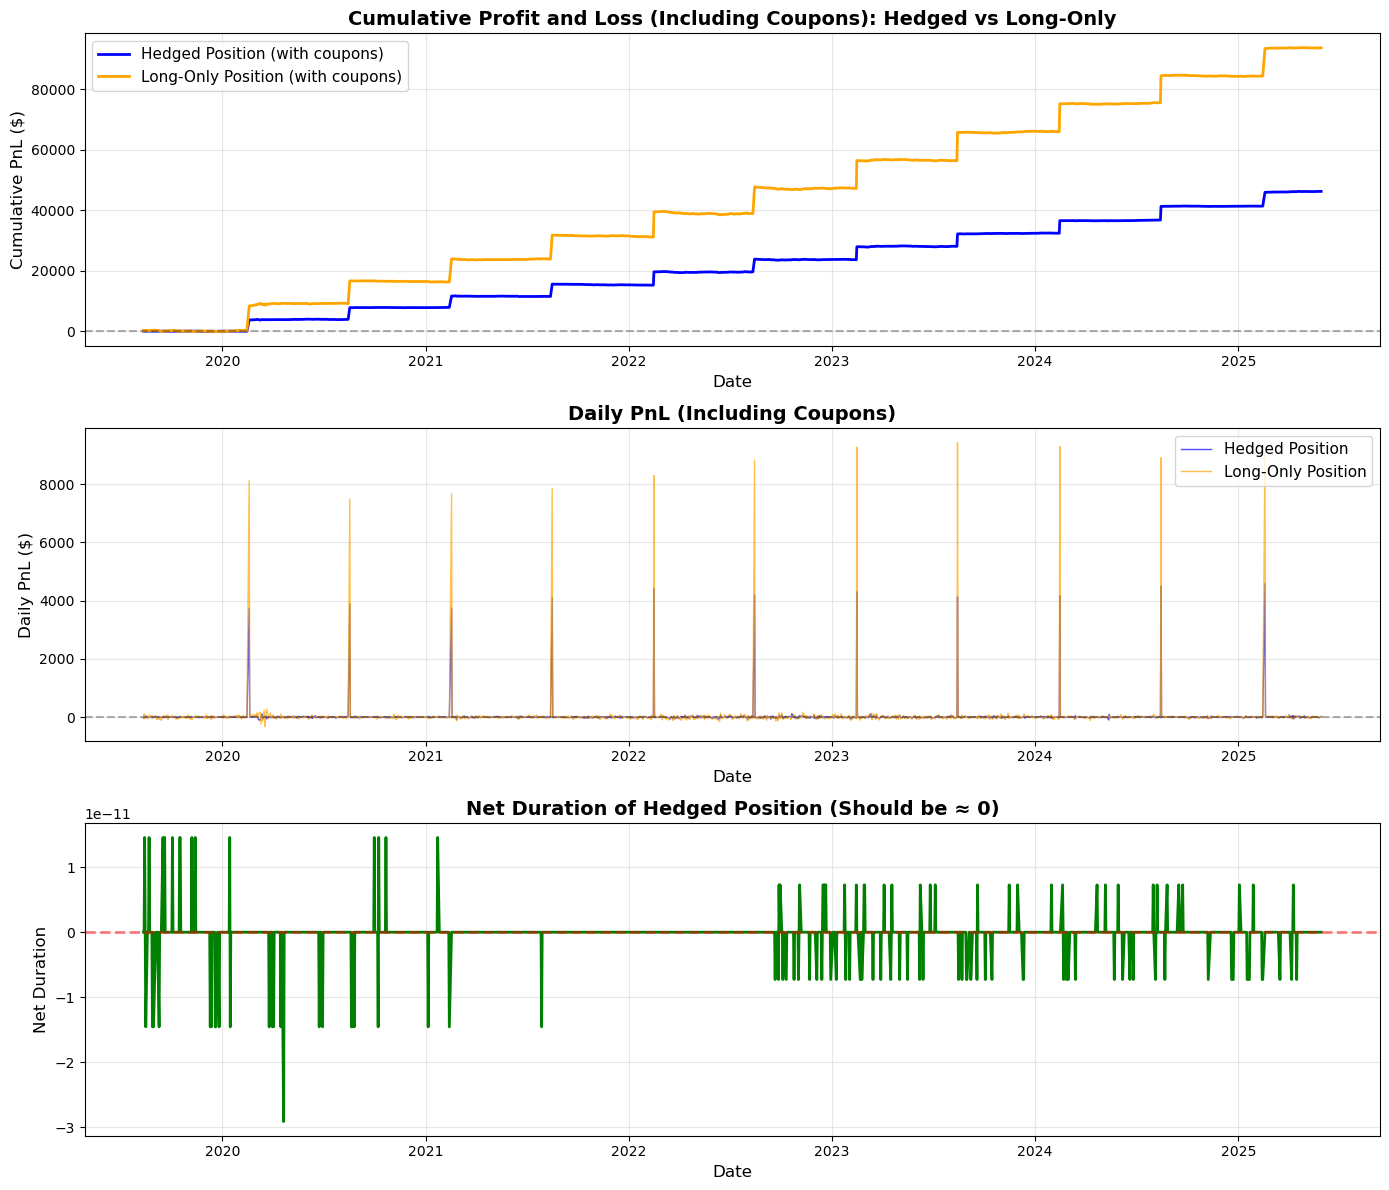

In [68]:
fig = plot_cumulative_pnl_with_coupons(results_df)
plt.show()

***